# 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls -la "/content/gdrive/MyDrive/darknet"

total 32
drwx------ 3 root root 4096 Dec 23 04:06 backup
drwx------ 2 root root 4096 Dec 23 02:37 bin
drwx------ 2 root root 4096 Dec 23 03:14 cfg
drwx------ 3 root root 4096 Dec 23 02:29 cuDNN
drwx------ 3 root root 4096 Dec 30 04:05 custom
drwx------ 4 root root 4096 Dec 23 03:14 data
drwx------ 2 root root 4096 Dec 23 02:29 .ipynb_checkpoints
drwx------ 2 root root 4096 Dec 23 02:44 weights


In [ ]:
!ls -la /usr/local/cuda/include/cudnn.h

-r--r--r-- 1 root root 134857 Sep 26  2019 /usr/local/cuda/include/cudnn.h


# 2. Install CUDA related modules, cuDNN

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [ ]:
!tar -xzvf /content/gdrive/MyDrive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


## 3. Load DarkNet

In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

[Errno 20] Not a directory: 'darknet'
/content/darknet
backup/  cfg/  chart.png  custom/  darknet*  data/  predictions.jpg  weights/


In [ ]:
!ls -la '/content/gdrive/MyDrive/darknet/bin/darknet'

!cp /content/gdrive/MyDrive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Dec 30 00:19 /content/gdrive/MyDrive/darknet/bin/darknet


# 4. Test Yolo

In [ ]:
!cp -r '/content/gdrive/MyDrive/darknet/weights' .
!cp -r '/content/gdrive/MyDrive/darknet/cfg' .
!cp -ar '/content/gdrive/MyDrive/darknet/data' .
%ls

backup/  cfg/  chart.png  custom/  darknet*  data/  predictions.jpg  weights/


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

      
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

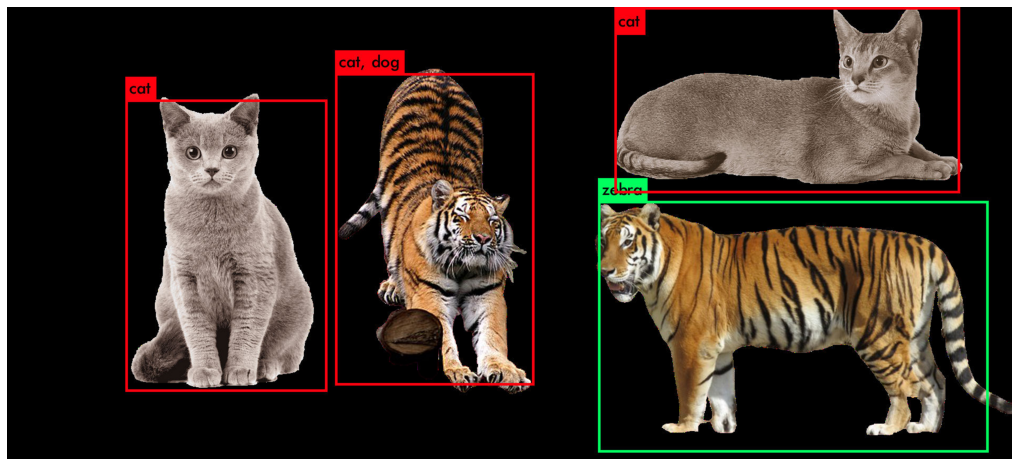

In [ ]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/animal01.png
imShow('predictions.jpg')

# 5. Custom Yolo

In [ ]:
!cp -r "/content/gdrive/MyDrive/darknet/custom" .

In [ ]:
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg weights/darknet53.conv.74 -dont_show
!cp -r "/content/darknet/backup" "/content/gdrive/MyDrive/darknet/backup"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Loaded: 0.000062 seconds

 4135: 0.049971, 0.073236 avg loss, 0.001000 rate, 3.363420 seconds, 132320 images
Loaded: 0.000049 seconds

 4136: 0.073466, 0.073259 avg loss, 0.001000 rate, 3.382924 seconds, 132352 images
Loaded: 0.000063 seconds

 4137: 0.079308, 0.073864 avg loss, 0.001000 rate, 3.373089 seconds, 132384 images
Loaded: 0.000036 seconds

 4138: 0.094313, 0.075909 avg loss, 0.001000 rate, 3.369223 seconds, 132416 images
Loaded: 0.000065 seconds

 4139: 0.051407, 0.073459 avg loss, 0.001000 rate, 3.382223 seconds, 132448 images
Loaded: 0.000056 seconds

 4140: 0.052858, 0.071399 avg loss, 0.001000 rate, 3.369692 seconds, 132480 images
Resizing
512 x 512 
 try to allocate additional workspace_size = 77.07 MB 
 CUDA allocate done! 
Loaded: 0.249465 seconds

 4141: 0.061134, 0.070372 avg loss, 0.001000 rate, 3.255345 seconds, 132512 images
Loaded: 0.000044 seconds

 4142: 0.074516, 0.070787 avg loss, 0.001000 rate, 3.382374 seconds, 132544 im

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_last.weights

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_final.weights

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_4000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_3000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_2000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
!./darknet detector map custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_1000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/gdrive/MyDrive/darknet"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/gdrive/MyDrive/darknet/backup/custom-train-yolo_final.weights" ./backup

In [ ]:
!ls -al ./backup

total 1443344
drwxr-xr-x 2 root root      4096 Dec 28 06:24 .
drwxr-xr-x 8 root root      4096 Dec 28 02:54 ..
-rw-r--r-- 1 root root 246326928 Dec 28 03:48 custom-train-yolo_1000.weights
-rw-r--r-- 1 root root 246326928 Dec 28 04:42 custom-train-yolo_2000.weights
-rw-r--r-- 1 root root 246326928 Dec 28 05:31 custom-train-yolo_3000.weights
-rw-r--r-- 1 root root 246326928 Dec 28 06:24 custom-train-yolo_4000.weights
-rw-r--r-- 1 root root 246326928 Dec 28 06:24 custom-train-yolo_final.weights
-rw-r--r-- 1 root root 246326928 Dec 28 06:24 custom-train-yolo_last.weights


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

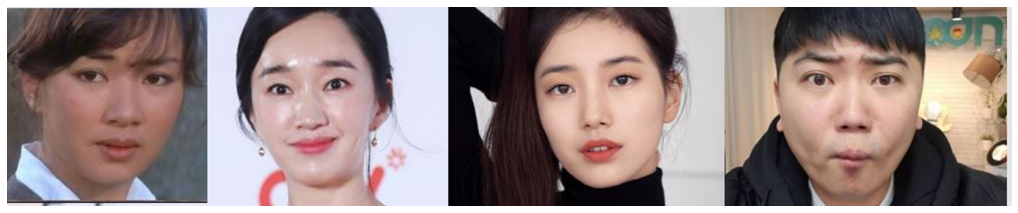

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_last.weights data/eye11.png -dont-show

imShow('predictions.jpg')